## Code Alongs API

In [114]:
from dotenv import load_dotenv
import requests
import pandas as pd 
import os 

load_dotenv()

api_key = os.getenv("ALPHA_API_KEY")

In [115]:
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey={api_key}'
response = requests.get(url)
data = response.json()

data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [116]:
data["Meta Data"]

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2024-03-19',
 '4. Output Size': 'Compact',
 '5. Time Zone': 'US/Eastern'}

In [117]:
data["Time Series (Daily)"]

{'2024-03-19': {'1. open': '191.4900',
  '2. high': '193.5800',
  '3. low': '190.2800',
  '4. close': '193.3400',
  '5. volume': '5317341'},
 '2024-03-18': {'1. open': '191.7000',
  '2. high': '193.2300',
  '3. low': '190.3200',
  '4. close': '191.6900',
  '5. volume': '5410562'},
 '2024-03-15': {'1. open': '191.9900',
  '2. high': '193.0573',
  '3. low': '190.7000',
  '4. close': '191.0700',
  '5. volume': '8828184'},
 '2024-03-14': {'1. open': '196.9500',
  '2. high': '197.7480',
  '3. low': '192.1200',
  '4. close': '193.4300',
  '5. volume': '4102202'},
 '2024-03-13': {'1. open': '197.5500',
  '2. high': '198.1000',
  '3. low': '195.3200',
  '4. close': '196.7000',
  '5. volume': '3960737'},
 '2024-03-12': {'1. open': '192.4600',
  '2. high': '199.1800',
  '3. low': '192.1500',
  '4. close': '197.7800',
  '5. volume': '5862512'},
 '2024-03-11': {'1. open': '195.0900',
  '2. high': '195.3800',
  '3. low': '190.8800',
  '4. close': '191.7300',
  '5. volume': '4712688'},
 '2024-03-08'

In [118]:
data["Time Series (Daily)"]["2024-03-18"]

{'1. open': '191.7000',
 '2. high': '193.2300',
 '3. low': '190.3200',
 '4. close': '191.6900',
 '5. volume': '5410562'}

In [119]:
data["Time Series (Daily)"]["2024-03-18"]["5. volume"]

'5410562'

In [120]:
pd.DataFrame(data["Time Series (Daily)"])

,2024-03-19,2024-03-18,2024-03-15,2024-03-14,2024-03-13,2024-03-12,2024-03-11,2024-03-08,2024-03-07,2024-03-06,...,2023-11-07,2023-11-06,2023-11-03,2023-11-02,2023-11-01,2023-10-31,2023-10-30,2023-10-27,2023-10-26,2023-10-25
1. open,191.4900,191.7000,191.9900,196.9500,197.5500,192.4600,195.0900,196.0600,197.5800,193.5000,...,149.0300,147.8900,147.4500,145.7700,145.0000,143.0000,143.1900,143.6200,142.2000,137.5000
2. high,193.5800,193.2300,193.0573,197.7480,198.1000,199.1800,195.3800,197.7700,198.7300,198.1300,...,149.2800,149.2250,148.4450,147.1000,146.5100,144.7600,144.5000,144.7000,144.4100,138.4900
3. low,190.2800,190.3200,190.7000,192.1200,195.3200,192.1500,190.8800,194.3800,196.1400,192.9600,...,148.0300,147.8500,147.2800,144.8400,144.4500,142.5900,142.5800,141.7100,141.5800,136.3300
4. close,193.3400,191.6900,191.0700,193.4300,196.7000,197.7800,191.7300,195.9500,196.5400,196.1600,...,148.8300,148.9700,147.9000,147.0100,145.4000,144.6400,142.6300,142.5200,143.7600,137.0800
5. volume,5317341,5410562,8828184,4102202,3960737,5862512,4712688,3943113,4604458,6945818,...,3549853,4597249,3510495,3902657,4750081,6592041,4204190,5469227,11130170,6472549


In [121]:
pd.DataFrame(data["Time Series (Daily)"]).transpose()

,1. open,2. high,3. low,4. close,5. volume
2024-03-19,191.4900,193.5800,190.2800,193.3400,5317341
2024-03-18,191.7000,193.2300,190.3200,191.6900,5410562
2024-03-15,191.9900,193.0573,190.7000,191.0700,8828184
2024-03-14,196.9500,197.7480,192.1200,193.4300,4102202
2024-03-13,197.5500,198.1000,195.3200,196.7000,3960737
...,...,...,...,...,...
2023-10-31,143.0000,144.7600,142.5900,144.6400,6592041
2023-10-30,143.1900,144.5000,142.5800,142.6300,4204190
2023-10-27,143.6200,144.7000,141.7100,142.5200,5469227
2023-10-26,142.2000,144.4100,141.5800,143.7600,11130170


### Iterate over several stocks

In [122]:
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols: 
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    series = df["4. close"].rename(symbol).astype(float)
    stock_list.append(series)

In [123]:
stock_list[0]

2024-03-19    176.08
2024-03-18    173.72
2024-03-15    172.62
2024-03-14    173.00
2024-03-13    171.13
               ...  
2023-10-31    170.77
2023-10-30    170.29
2023-10-27    168.22
2023-10-26    166.89
2023-10-25    171.10
Name: AAPL, Length: 100, dtype: float64

In [124]:
len(stock_list)

4

In [125]:
stocks = pd.concat(stock_list, axis=1)
stocks

,AAPL,NVDA,TSLA,IBM
2024-03-19,176.08,893.980,171.32,193.34
2024-03-18,173.72,884.550,173.80,191.69
2024-03-15,172.62,878.365,163.57,191.07
2024-03-14,173.00,879.440,162.50,193.43
2024-03-13,171.13,908.880,169.48,196.70
...,...,...,...,...
2023-10-31,170.77,407.800,200.84,144.64
2023-10-30,170.29,411.610,197.36,142.63
2023-10-27,168.22,405.000,207.30,142.52
2023-10-26,166.89,403.260,205.76,143.76


In [126]:
import plotly_express as px 

px.line(stocks, x=stocks.index, y=stocks.columns)

## Working with time series

In [127]:
print(stocks.index.dtype)
stocks.index = pd.to_datetime(stocks.index)
print(stocks.index.dtype)
stocks.head()

object
datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2024-03-19,176.08,893.980,171.32,193.34
2024-03-18,173.72,884.550,173.80,191.69
2024-03-15,172.62,878.365,163.57,191.07
2024-03-14,173.00,879.440,162.50,193.43
2024-03-13,171.13,908.880,169.48,196.70


In [128]:
stocks.loc["2023-11"]

,AAPL,NVDA,TSLA,IBM
2023-11-30,189.95,467.70,240.08,158.56
2023-11-29,189.37,481.40,244.14,156.41
2023-11-28,190.40,478.21,246.72,155.65
2023-11-27,189.79,482.42,236.08,155.57
2023-11-24,189.97,477.76,235.45,155.18
2023-11-22,191.31,487.16,234.21,155.13
2023-11-21,190.64,499.44,241.20,153.91
2023-11-20,191.45,504.09,235.60,154.35
2023-11-17,189.69,492.98,234.30,152.89
2023-11-16,189.71,494.80,233.59,153.06


In [129]:
stocks.sort_index().loc["2024-02":"2024-03"]

,AAPL,NVDA,TSLA,IBM
2024-02-01,186.86,630.270,188.86,186.90
2024-02-02,185.85,661.600,187.91,185.79
2024-02-05,187.68,693.320,181.06,183.42
2024-02-06,189.30,682.230,185.10,183.41
2024-02-07,189.41,700.990,187.58,183.74
2024-02-08,188.32,696.410,189.56,184.36
2024-02-09,188.85,721.330,193.57,186.34
2024-02-12,187.15,722.480,188.13,186.16
2024-02-13,185.04,721.280,184.02,183.70
2024-02-14,184.15,739.000,188.71,183.57


### Plot 4 stocks in subplots

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

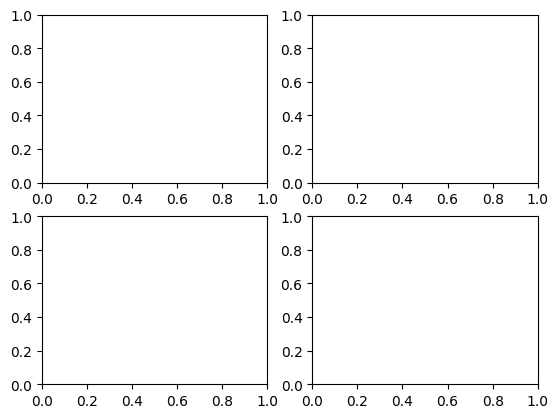

In [130]:
import seaborn as sns 
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(2,2)
axes


In [131]:
axes.shape

(2, 2)

In [132]:
axes.flatten(), axes.flatten().shape

(array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object), (4,))

TypeError: 'str' object is not callable

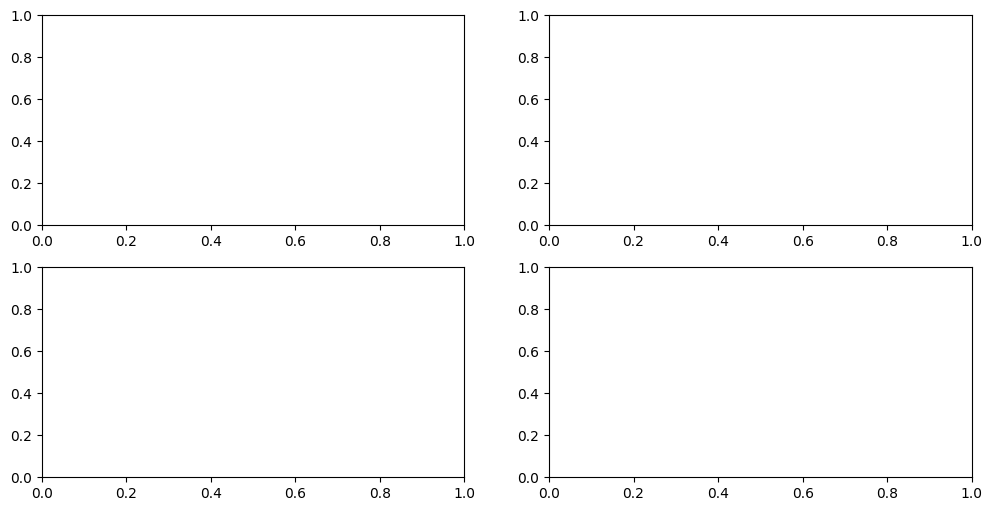

In [134]:
fig, axes = plt.subplots(2,2, dpi=100, figsize=(12,6))

stock_names = {"AAPL": "Apple", "NVDA": "Nvidia", "TSLA": "Tesla", "IBM": "IBM"}

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks.loc["2024"], x=stocks.loc["2024"].index, y=symbol, ax=ax)
    ax.set(title=f"{stock_names[symbol]}")

fig.tight_layout()
fig.suptitle("Stocks in 2024", y=1.03, fontweight="bold")